Imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

D:\Anaconda3\envs\V02 With Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\V02 With Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\V02 With Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\V02 With Keras\lib\site-packages\tensorflow\python\framework\dty

Keras imports:

In [4]:
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding, LSTM,Dropout, Activation
from tensorflow.python.keras.optimizers import RMSprop, SGD
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Importing the data and setting the datetime as index

In [7]:
path="C:/Users/lemin/Desktop/weather"
city_attributes=pd.read_csv(path+"/city_attributes.csv")
humidity=pd.read_csv(path+"/humidity.csv")
pressure=pd.read_csv(path+"/pressure.csv")
temperature=pd.read_csv(path+"/temperature.csv")
weather_description=pd.read_csv(path+"/weather_description.csv")
wind_direction=pd.read_csv(path+"/wind_direction.csv")
wind_speed=pd.read_csv(path+"/wind_speed.csv")
humidity.datetime=pd.to_datetime(humidity.datetime,infer_datetime_format=True)
humidity=humidity.set_index("datetime")
pressure.datetime=pd.to_datetime(pressure.datetime,infer_datetime_format=True)
pressure=pressure.set_index("datetime")
temperature.datetime=pd.to_datetime(temperature.datetime,infer_datetime_format=True)
temperature=temperature.set_index("datetime")
wind_direction.datetime=pd.to_datetime(wind_direction.datetime,infer_datetime_format=True)
wind_direction=wind_direction.set_index("datetime")
wind_speed.datetime=pd.to_datetime(wind_speed.datetime,infer_datetime_format=True)
wind_speed=wind_speed.set_index("datetime")

In [9]:
city_attributes.columns

Index(['City', 'Country', 'Latitude', 'Longitude'], dtype='object')

We are going to work on only the american cities

In [10]:
american_cities_attributes=city_attributes[["City","Latitude",'Longitude']][city_attributes["Country"]=="United States"]
humidity_usa=humidity[american_cities_attributes.City]
pressure_usa=pressure[american_cities_attributes.City]
temperature_usa=temperature[american_cities_attributes.City]
wind_direction_usa=wind_direction[american_cities_attributes.City]
wind_speed_usa=wind_speed[american_cities_attributes.City]

In [11]:
american_cities_attributes.City

1          Portland
2     San Francisco
3           Seattle
4       Los Angeles
5         San Diego
6         Las Vegas
7           Phoenix
8       Albuquerque
9            Denver
10      San Antonio
11           Dallas
12          Houston
13      Kansas City
14      Minneapolis
15      Saint Louis
16          Chicago
17        Nashville
18     Indianapolis
19          Atlanta
20          Detroit
21     Jacksonville
22        Charlotte
23            Miami
24       Pittsburgh
26     Philadelphia
27         New York
29           Boston
Name: City, dtype: object

Creating a dataframe containing all the american cities with their attributes

In [12]:
data=pd.DataFrame()
for city in list(american_cities_attributes.City):
    df1=pd.DataFrame(columns=["humidity","pressure","temperature","wind_direction","wind_speed"])
    df1["humidity"]=humidity_usa[city]
    df1["pressure"]=pressure_usa[city]
    df1["temperature"]=temperature_usa[city]
    df1["wind_direction"]=wind_direction_usa[city]
    df1["wind_speed"]=wind_speed_usa[city]
    columns=[(city,'humidity'),(city,'pressure'),(city,'temperature'),(city,'wind_direction'),(city,'wind_speed')]
    df1.columns=pd.MultiIndex.from_tuples(columns)
    data=pd.concat([data,df1],axis=1)

In [13]:
data

Portland                                                 \
                    humidity pressure temperature wind_direction wind_speed   
datetime                                                                      
2012-10-01 12:00:00      NaN      NaN         NaN            NaN        NaN   
2012-10-01 13:00:00     81.0   1024.0  282.080000            0.0        0.0   
2012-10-01 14:00:00     80.0   1024.0  282.083252            4.0        0.0   
2012-10-01 15:00:00     80.0   1024.0  282.091866           18.0        0.0   
2012-10-01 16:00:00     80.0   1024.0  282.100481           31.0        0.0   
...                      ...      ...         ...            ...        ...   
2017-11-29 20:00:00     81.0   1031.0  282.000000           50.0        2.0   
2017-11-29 21:00:00     71.0   1030.0  282.890000          330.0        1.0   
2017-11-29 22:00:00     71.0   1030.0  283.390000          290.0        1.0   
2017-11-29 23:00:00     71.0   1029.0  283.020000          290.0        2.0   
2017-11-30 00:00:00     76.0   1029.0  282.280000          340.0        1.0   

                    San Francisco                                      \
                         humidity pressure temperature wind_direction   
datetime                                                                
2012-10-01 12:00:00           NaN      NaN         NaN            NaN   
2012-10-01 13:00:00          88.0   1009.0  289.480000          150.0   
2012-10-01 14:00:00          87.0   1009.0  289.474993          147.0   
2012-10-01 15:00:00          86.0   1009.0  289.460618          141.0   
2012-10-01 16:00:00          85.0   1009.0  289.446243          135.0   
...                           ...      ...         ...            ...   
2017-11-29 20:00:00           NaN      NaN         NaN            NaN   
2017-11-29 21:00:00           NaN      NaN         NaN            NaN   
2017-11-29 22:00:00           NaN      NaN         NaN            NaN   
2017-11-29 23:00:00           NaN      NaN         NaN            NaN   
2017-11-30 00:00:00           NaN      NaN         NaN            NaN   

                                ... New York                       \
                    wind_speed  ... humidity pressure temperature   
datetime                        ...                                 
2012-10-01 12:00:00        NaN  ...      NaN      NaN         NaN   
2012-10-01 13:00:00        2.0  ...     58.0   1012.0  288.220000   
2012-10-01 14:00:00        2.0  ...     57.0   1012.0  288.247676   
2012-10-01 15:00:00        2.0  ...     57.0   1012.0  288.326940   
2012-10-01 16:00:00        2.0  ...     57.0   1012.0  288.406203   
...                        ...  ...      ...      ...         ...   
2017-11-29 20:00:00        NaN  ...      NaN      NaN         NaN   
2017-11-29 21:00:00        NaN  ...      NaN      NaN         NaN   
2017-11-29 22:00:00        NaN  ...      NaN      NaN         NaN   
2017-11-29 23:00:00        NaN  ...      NaN      NaN         NaN   
2017-11-30 00:00:00        NaN  ...      NaN      NaN         NaN   

                                                Boston                       \
                    wind_direction wind_speed humidity pressure temperature   
datetime                                                                      
2012-10-01 12:00:00            NaN        NaN      NaN      NaN         NaN   
2012-10-01 13:00:00          260.0        7.0     68.0   1014.0  287.170000   
2012-10-01 14:00:00          260.0        7.0     68.0   1014.0  287.186092   
2012-10-01 15:00:00          260.0        7.0     68.0   1014.0  287.231672   
2012-10-01 16:00:00          260.0        7.0     68.0   1014.0  287.277251   
...                            ...        ...      ...      ...         ...   
2017-11-29 20:00:00            NaN        NaN     37.0   1017.0  288.080000   
2017-11-29 21:00:00            NaN        NaN     74.0   1019.0  286.020000   
2017-11-29 22:00:00            NaN        NaN     74.0

In [14]:
pd.set_option("max_row",1000)
pd.set_option("max_column",1000)

In [15]:
data.isna().sum()

Portland       humidity           449
               pressure             4
               temperature          1
               wind_direction       1
               wind_speed           1
San Francisco  humidity           942
               pressure           815
               temperature        793
               wind_direction     794
               wind_speed         794
Seattle        humidity           289
               pressure            13
               temperature          3
               wind_direction       1
               wind_speed           1
Los Angeles    humidity           152
               pressure           252
               temperature          3
               wind_direction       1
               wind_speed           1
San Diego      humidity           344
               pressure           175
               temperature          1
               wind_direction       1
               wind_speed           1
Las Vegas      humidity           842
            

Locating the rows that contain missing values

In [23]:
complete=np.zeros(data.shape[1])
indexes=[]
for index, row in data.iterrows():
    if (np.array_equal(row.isnull().values,complete)==False):
        indexes.append(index)
indexes

[Timestamp('2012-10-01 12:00:00'),
 Timestamp('2012-10-02 16:00:00'),
 Timestamp('2012-10-02 17:00:00'),
 Timestamp('2012-10-02 19:00:00'),
 Timestamp('2012-10-02 20:00:00'),
 Timestamp('2012-10-02 21:00:00'),
 Timestamp('2012-10-02 22:00:00'),
 Timestamp('2012-10-02 23:00:00'),
 Timestamp('2012-10-03 00:00:00'),
 Timestamp('2012-10-03 02:00:00'),
 Timestamp('2012-10-03 03:00:00'),
 Timestamp('2012-10-03 04:00:00'),
 Timestamp('2012-10-03 08:00:00'),
 Timestamp('2012-10-03 11:00:00'),
 Timestamp('2012-10-03 12:00:00'),
 Timestamp('2012-10-03 14:00:00'),
 Timestamp('2012-10-03 15:00:00'),
 Timestamp('2012-10-03 16:00:00'),
 Timestamp('2012-10-03 17:00:00'),
 Timestamp('2012-10-04 02:00:00'),
 Timestamp('2012-10-04 07:00:00'),
 Timestamp('2012-10-04 09:00:00'),
 Timestamp('2012-10-04 13:00:00'),
 Timestamp('2012-10-04 14:00:00'),
 Timestamp('2012-10-04 15:00:00'),
 Timestamp('2012-10-04 23:00:00'),
 Timestamp('2012-10-05 00:00:00'),
 Timestamp('2012-10-05 03:00:00'),
 Timestamp('2012-10-

Many consecutive rows have missing values, espacially for Miami and New York. We chose to delete these rows

In [16]:
last_indexes=data.loc["2017-10-28 01:00:00":"2017-11-30 00:00:00"].index
data.drop(last_indexes,axis=0,inplace=True)
pd.set_option("max_r",500000)
data.shape

(44461, 135)

### For every missing value, we calculated the mean of that feature on that given day and replaced the missing value with this mean

In [17]:
data_cleaned=data.copy()
for i,j in data_cleaned.columns:
    #mean per day
    mean=data_cleaned[(i,j)].resample("D").mean()
    missing_values_indexes=data_cleaned[(i,j)][data_cleaned[(i,j)].isna()].index
    for k in missing_values_indexes:
        data_cleaned[(i,j)].loc[k]=mean[k.day-1]
    
    

In [18]:
data_cleaned.shape

(44461, 135)

Adding data

In [19]:
data_cleaned[("all_cities","day")]=data_cleaned.index.dayofyear
data_cleaned[("all_cities","hour")]=data_cleaned.index.hour
data_cleaned[("all_cities","week_of_year")]=data_cleaned.index.weekofyear
data_cleaned[("all_cities","month")]=data_cleaned.index.month

In [20]:
data_cleaned.head(5)

Portland                                                 \
                      humidity pressure temperature wind_direction wind_speed   
datetime                                                                        
2012-10-01 12:00:00  78.727273   1024.0  282.118197      57.727273        0.0   
2012-10-01 13:00:00  81.000000   1024.0  282.080000       0.000000        0.0   
2012-10-01 14:00:00  80.000000   1024.0  282.083252       4.000000        0.0   
2012-10-01 15:00:00  80.000000   1024.0  282.091866      18.000000        0.0   
2012-10-01 16:00:00  80.000000   1024.0  282.100481      31.000000        0.0   

                    San Francisco                                          \
                         humidity     pressure temperature wind_direction   
datetime                                                                    
2012-10-01 12:00:00          83.0  1009.727273  289.416642     122.363636   
2012-10-01 13:00:00          88.0  1009.000000  289.480000     150.000000   
2012-10-01 14:00:00          87.0  1009.000000  289.474993     147.000000   
2012-10-01 15:00:00          86.0  1009.000000  289.460618     141.000000   
2012-10-01 16:00:00          85.0  1009.000000  289.446243     135.000000   

                                Seattle                                      \
                    wind_speed humidity pressure temperature wind_direction   
datetime                                                                      
2012-10-01 12:00:00   1.636364     78.0   1030.0  281.767262      32.272727   
2012-10-01 13:00:00   2.000000     81.0   1027.0  281.800000       0.000000   
2012-10-01 14:00:00   2.000000     80.0   1027.0  281.797217       2.000000   
2012-10-01 15:00:00   2.000000     80.0   1028.0  281.789833      10.000000   
2012-10-01 16:00:00   2.000000     79.0   1028.0  281.782449      17.000000   

                               Los Angeles                       \
                    wind_speed    humidity pressure temperature   
datetime                                                          
2012-10-01 12:00:00        0.0        88.0   1013.0  291.846501   
2012-10-01 13:00:00        0.0        88.0   1013.0  291.870000   
2012-10-01 14:00:00        0.0        88.0   1013.0  291.868186   
2012-10-01 15:00:00        0.0        88.0   1013.0  291.862844   
2012-10-01 16:00:00        0.0        88.0   1013.0  291.857503   

                                               San Diego                       \
                    wind_direction wind_speed   humidity pressure temperature   
datetime                                                                        
2012-10-01 12:00:00            0.0        0.0  79.909091   1013.0  291.573495   
2012-10-01 13:00:00            0.0        0.0  82.000000   1013.0  291.530000   
2012-10-01 14:00:00            0.0        0.0  81.000000   1013.0  291.533501   
2012-10-01 15:00:00            0.0        0.0  81.000000   1013.0  291.543355   
2012-10-01 16:00:00            0.0        0.0  81.000000   1013.0  291.553209   

                                               Las Vegas                       \
                    wind_direction wind_speed   humidity pressure temperature   
datetime                                                                        
2012-10-01 12:00:00            0.0        0.0  20.727273   1018.0  293.358911   
2012-10-01 13:00:00            0.0        0.0  22.000000   1018.0  293.410000   
2012-10-01 14:00:00            0.0        0.0  21.000000   1018.0  293.403141   
2012-10-01 15:00:00            0.0        0.0  21.000000   1018.0  293.392177   
2012-10-01 16:00:00            0.0        0.0  21.000000   1018.0  293.381213   

                                                 Phoenix                       \
                    wind_direction wind_speed   humidity pressure temperature   
datetime                                                                        
2012-10-01 12:00:00      65.727273        0.0

Target city: Chicago

In [21]:
target_city="Chicago"

In [22]:
target_signals=["temperature","humidity","pressure"]

In [23]:
#data_cleaned.drop(labels=["wind_direction","wind_speed"],level=1,axis=1,inplace=True)

### We want to predict the weather 24 hours into the future

In [24]:
shift_days=1
shift_steps=shift_days*24

### Creating a data frame containing the shifted data for the target city and signals

In [25]:
target_df=data_cleaned[target_city][target_signals].shift(-shift_steps)

In [26]:
target_df.head(5)

,temperature,humidity,pressure
datetime,,,
2012-10-01 12:00:00,286.754558,62.000000,1014.000000
2012-10-01 13:00:00,286.877279,62.000000,1014.000000
2012-10-01 14:00:00,287.000000,62.000000,1014.000000
2012-10-01 15:00:00,289.300000,51.000000,1014.000000
2012-10-01 16:00:00,289.850000,60.578947,1013.526316


Numpy arrays for the model

In [27]:
X_data=data_cleaned.values[:-shift_steps]
Y_data=target_df.values[:-shift_steps]

In [28]:
print("X_data shape:",X_data.shape)
print("Y_data shape:",Y_data.shape)

X_data shape: (44437, 139)
Y_data shape: (44437, 3)


### We will train the model on 90% of the data

In [29]:
train_test_split=0.9
num_train=int(len(X_data)*0.9)
print(num_train)

39993


In [30]:
X_train=X_data[0:num_train]
X_test=X_data[num_train:]
print(len(X_train)+len(X_test))

44437


In [31]:
Y_train = Y_data[0:num_train]
Y_test = Y_data[num_train:]
len(Y_train) + len(Y_test)

44437

### Scaling the data

In [32]:
X_scaler = MinMaxScaler()
X_scaler.fit(X_train)
X_train_scaled=X_scaler.transform(X_train)

In [33]:
print("min is {:f} \n max is {:f}".format(np.min(X_train_scaled),np.max(X_train_scaled)))

min is 0.000000 
 max is 1.000000


In [34]:
X_test_scaled=X_scaler.transform(X_test)

In [35]:
Y_scaler = MinMaxScaler()
Y_scaler.fit(Y_train)
Y_train_scaled = Y_scaler.transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)

### Let's create a batch generator

In [36]:
def batch_generator(batch_size,sequence_length,x_train,y_train):
    while True:
        x_shape=(batch_size,sequence_length,x_train.shape[1])
        x_batch=np.zeros(x_shape)
        y_shape=(batch_size,sequence_length,y_train.shape[1])
        y_batch=np.zeros(y_shape)
        for i in range(batch_size):
            #getting a random index
            idx=np.random.randint(x_train.shape[0]-sequence_length)
            x_batch[i]=x_train[idx:idx+sequence_length]
            y_batch[i]=y_train[idx:idx+sequence_length]
            yield(x_batch,y_batch)

In [37]:
batch_size=32

In [38]:
sequence_length=24*7*8

In [39]:
generator=batch_generator(batch_size,sequence_length,X_train_scaled,Y_train_scaled)

### Testing the generator

In [40]:
x_batch, y_batch = next(generator)

In [41]:
x_batch.shape

(32, 1344, 139)

In [42]:
y_batch.shape

(32, 1344, 3)

Let's plot one of the signals obtained

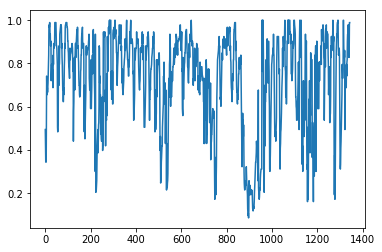

In [43]:
plt.plot(x_batch[0,:,5])

### Validation set

After each epoch, we will test our model on the whole test set. Let's add one dimension to X_test and Y_test denoting the number of batch.

In [44]:
validation_data=(np.expand_dims(X_test_scaled,axis=0),np.expand_dims(Y_test_scaled,axis=0))

###  Creating the Recurrent Neural Network

In [45]:
model=Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(None,X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(LSTM(units=128,return_sequences=True,input_shape=(None,X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=Y_train_scaled.shape[1],activation="sigmoid"))



In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 128)         137216    
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 3)           387       
Total params: 269,187
Trainable params: 269,187
Non-trainable params: 0
_________________________________________________________________


### Loss function

We are going to use the Mean Squarred Error as the loss-function to be minimized. MSE measures how closely the model's output matches the true output signals. At the beggining of a sequence, the model has seen only a few time-steps, so its output may be highly innacurate. We do not want to punish the model for these outputs, because using the loss values for the early time steps may cause the model to distort its later outputs. Therefore, we're giving the model a "warm-up" period during which the model won't be punished.

In [85]:
warm_up_period=50

In [44]:
def loss_mse_warmup(warm_up_period):
    def loss_mse(Y_true,Y_pred):
        Y_true_sliced=Y_true[:,warm_up_period:,:]
        Y_pred_sliced=Y_pred[:,warm_up_period:,:]
        loss= tf.losses.mean_squared_error(labels=Y_true_sliced,
                                        predictions=Y_pred_sliced)
        loss_mean = tf.reduce_mean(loss)
        return (loss_mean)
    return (loss_mse)


##### Creating an instance of the loss-function

In [45]:
loss_func=loss_mse_warmup(warm_up_period)

#### Definfing an optimizer and compiling the  model

Trying adam optimizer

In [47]:
model.compile(optimizer='adam',loss=loss_func)

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 128)         137216    
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 3)           387       
Total params: 269,187
Trainable params: 269,187
Non-trainable params: 0
_________________________________________________________________


#### Callbacks

In [49]:
checkpoint_path="D:/weather_pred_models/check_point2"
callback_checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [50]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [51]:
tensorboard_logs_path="D:/weather_pred_models/tensorboard_logs"
callback_tensorboard = TensorBoard(log_dir=tensorboard_logs_path,
                                   histogram_freq=1,
                                   write_graph=True)



In [52]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-6,
                                       patience=2,
                                       verbose=1)

In [53]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [51]:
callbacks = [callback_early_stopping,
             callback_checkpoint]

#### Training the model

In [52]:
steps_per_epoch=int(X_train_scaled.shape[0]/sequence_length)



In [53]:
model.fit_generator(generator=generator,
                    epochs=50,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_data,
                    callbacks=callbacks,verbose=1)

Epoch 1/50
28/29 [===========================>..] - ETA: 5s - loss: 0.0614 
Epoch 00001: val_loss improved from inf to 0.01648, saving model to D:/weather_pred_models/check_point2

Consider using a TensorFlow optimizer from `tf.train`.
29/29 [==============================] - 157s 5s/step - loss: 0.0598 - val_loss: 0.0165
Epoch 2/50
28/29 [===========================>..] - ETA: 4s - loss: 0.0110
Epoch 00002: val_loss improved from 0.01648 to 0.01407, saving model to D:/weather_pred_models/check_point2

Consider using a TensorFlow optimizer from `tf.train`.
29/29 [==============================] - 149s 5s/step - loss: 0.0110 - val_loss: 0.0141
Epoch 3/50
28/29 [===========================>..] - ETA: 5s - loss: 0.0106 
Epoch 00003: val_loss improved from 0.01407 to 0.01175, saving model to D:/weather_pred_models/check_point2

Consider using a TensorFlow optimizer from `tf.train`.
29/29 [==============================] - 158s 5s/step - loss: 0.0106 - val_loss: 0.0117
Epoch 4/50
28/29 [===

KeyboardInterrupt: 

In [83]:
def plot_comparison(start_idx, length=1000, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = X_train_scaled
        y_true = Y_train
    else:
        # Use test-data.
        x = X_test_scaled
        y_true = Y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = Y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_signals)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warm_up_period, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_signals[signal])
        plt.legend()
        plt.show()

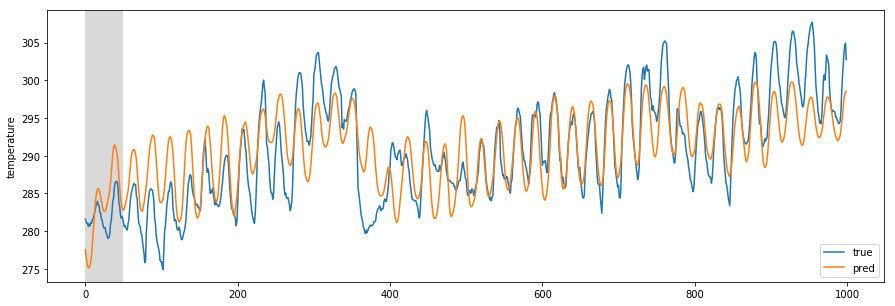

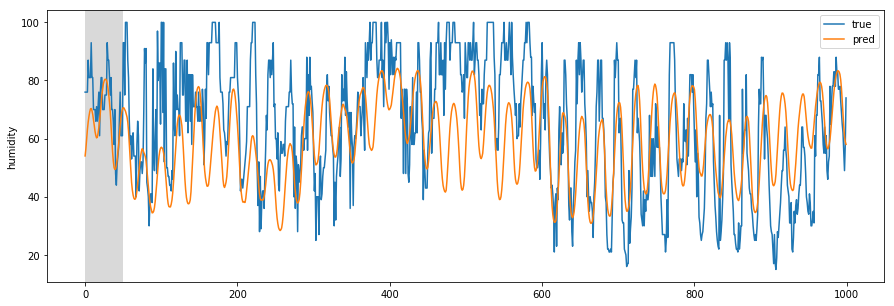

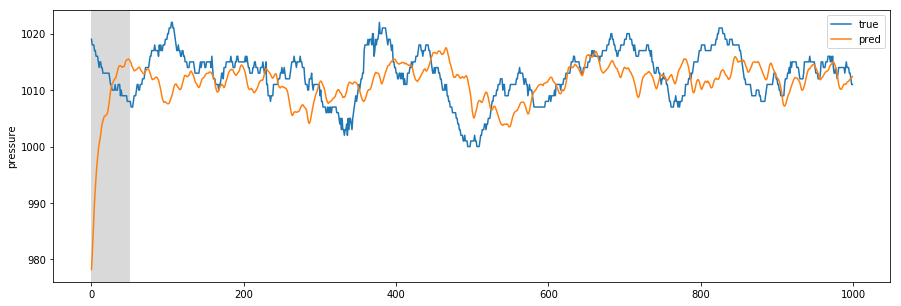

In [56]:
plot_comparison(start_idx=200, length=1000, train=False)

### Restoring session

INFO:tensorflow:Restoring parameters from D:/weather_pred_models/check_point2
INFO:tensorflow:Restoring parameters from D:/weather_pred_models/check_point2


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000015C885B2EF0>>
Traceback (most recent call last):
  File "D:\Anaconda3\envs\V02 With Keras\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "D:\Anaconda3\envs\V02 With Keras\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


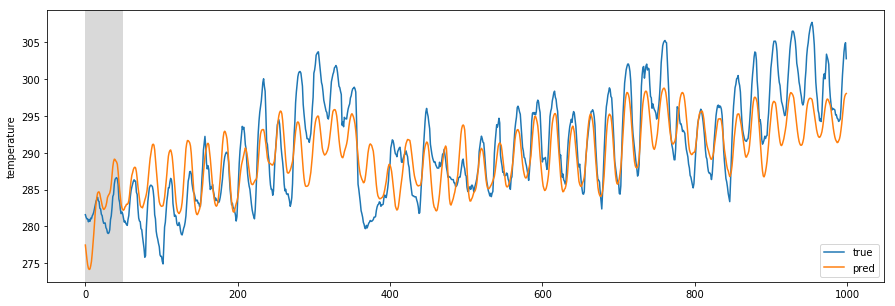

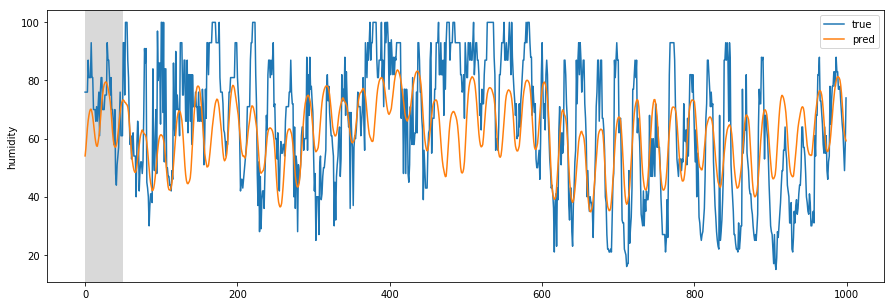

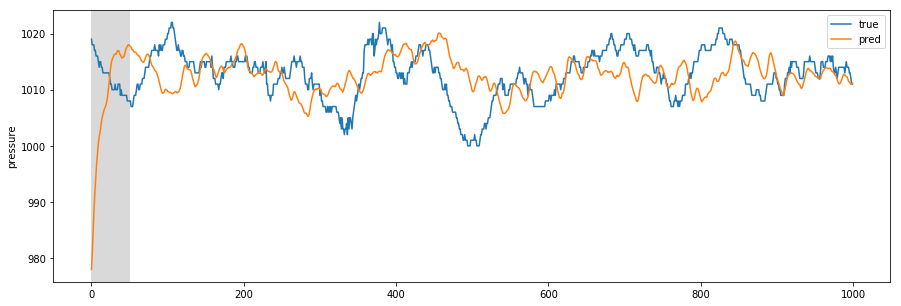

In [87]:
#restoring the checkpoint
saver = tf.train.Saver()
with tf.Session() as sess:
  #saver = tf.train.import_meta_graph('my_test_model-1000.meta')
    saver.restore(sess, tf.train.latest_checkpoint("D:/weather_pred_models/"))
    plot_comparison(start_idx=200, length=1000, train=False)